In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("CC GENERAL.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].min(),inplace=True)
data = data.drop('CUST_ID',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
da = pd.DataFrame()
da['BALANCE']=data['BALANCE']
da['PAYMENTS']=data['PAYMENTS']

In [ ]:
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
labels = model.fit_predict(da)
agg = pd.DataFrame(labels)
np.unique(agg, return_counts=True)

(array([0, 1, 2, 3, 4]), array([8750,  172,    2,   22,    4]))

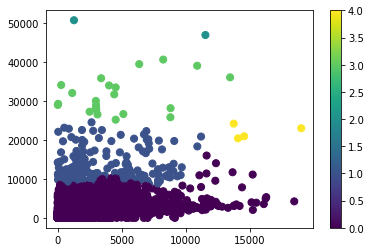

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['BALANCE'],data['PAYMENTS'], c = agg[0], s = 50)
plt.colorbar(scatter)

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(da)
fig.update_layout(width=800, height=500)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(da)
lbl=kmeans.predict(da)

In [ ]:
sum_of_squared_distances =[]
i = range(1,15)
for I in i:
  km=KMeans(n_clusters=I)
  km.fit(da)
  sum_of_squared_distances.append(km.inertia_)

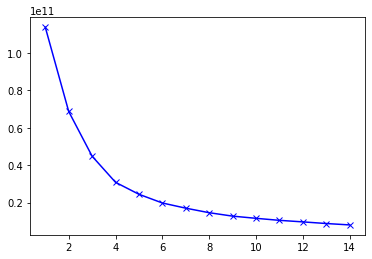

In [ ]:
plt.plot(i, sum_of_squared_distances,"bx-")

In [ ]:
km=KMeans(n_clusters=4)
km.fit(da)
ll=km.predict(da)

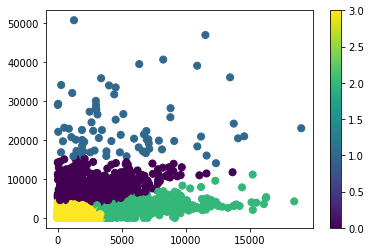

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['BALANCE'],data['PAYMENTS'], c = ll, s = 50)
plt.colorbar(scatter)